/home/eugene/.local/share/mise/installs/python/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/home/eugene/.local/share/mise/installs/python/3.13.1/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


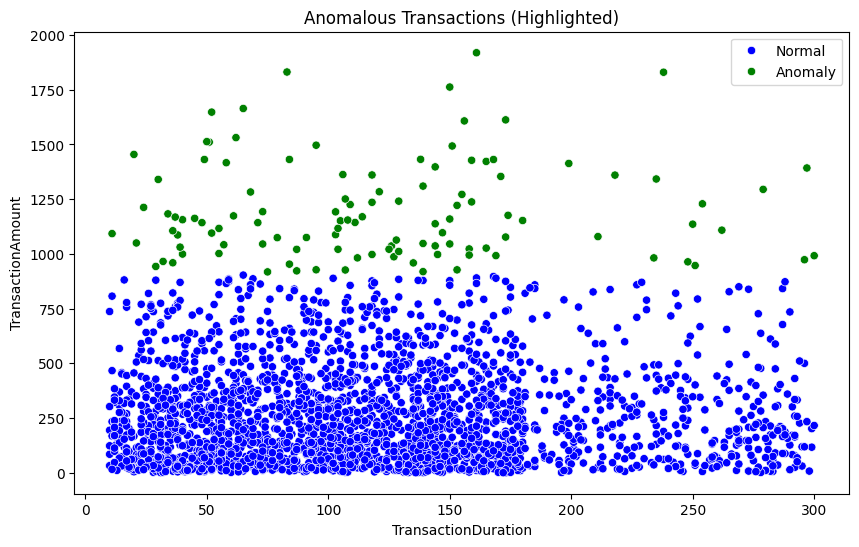

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest

data_path = "./data/bank.csv"
try:
    transactions = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: The file at {data_path} was not found.")
    raise

features = transactions[["TransactionAmount", "TransactionDuration", "AccountBalance"]]

model = IForest(n_estimators=100, contamination=0.05, random_state=42)
try:
    model.fit(features)
except Exception as e:
    print(f"Error during model training: {e}")
    raise

try:
    transactions["Anomaly_Score"] = model.decision_function(features)
    transactions["Anomaly"] = (model.predict(features) == 1)
except Exception as e:
    print(f"Error while processing anomalies: {e}")
    raise


plt.figure(figsize=(10, 6))
color_palette = {False: 'blue', True: 'green'}

sns.scatterplot(data=transactions,
                x='TransactionDuration',
                y='TransactionAmount',
                hue=transactions.index.isin(anomalies.index),
                palette=color_palette)

plt.title('Anomalous Transactions (Highlighted)')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Normal', 'Anomaly'], title=None)
plt.show()